In [ ]:
from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls -lh /content/drive/MyDrive/ShoftLiftingProject/


total 727M
-rw------- 1 root root 727M Dec  1 05:46 'Shoplifting-dataset (2).zip'


In [ ]:
!cp "/content/drive/MyDrive/ShoftLiftingProject/Shoplifting-dataset (2).zip" /content/


In [ ]:
!ls -lh /content/


total 727M
drwx------ 5 root root 4.0K Dec  1 07:52  drive
drwxr-xr-x 1 root root 4.0K Nov 20 14:30  sample_data
-rw------- 1 root root 727M Dec  1 07:59 'Shoplifting-dataset (2).zip'


In [ ]:
!unzip -t "/content/Shoplifting-dataset (2).zip"


Archive:  /content/Shoplifting-dataset (2).zip
    testing: Shoplifting-dataset.zip   OK
No errors detected in compressed data of /content/Shoplifting-dataset (2).zip.


In [ ]:
!unzip "/content/Shoplifting-dataset (2).zip" -d /content/dataset/


Archive:  /content/Shoplifting-dataset (2).zip
  inflating: /content/dataset/Shoplifting-dataset.zip  


In [ ]:
!ls /content/dataset/


Shoplifting-dataset.zip


In [ ]:
!unzip "/content/dataset/Shoplifting-dataset.zip" -d /content/dataset/final/


Archive:  /content/dataset/Shoplifting-dataset.zip
   creating: /content/dataset/final/Shoplifting dataset/
   creating: /content/dataset/final/Shoplifting dataset/Normal/
  inflating: /content/dataset/final/Shoplifting dataset/Normal/Normal (1).mp4  
  inflating: /content/dataset/final/Shoplifting dataset/Normal/Normal (10).mp4  
  inflating: /content/dataset/final/Shoplifting dataset/Normal/Normal (11).mp4  
  inflating: /content/dataset/final/Shoplifting dataset/Normal/Normal (12).mp4  
  inflating: /content/dataset/final/Shoplifting dataset/Normal/Normal (13).mp4  
  inflating: /content/dataset/final/Shoplifting dataset/Normal/Normal (14).mp4  
  inflating: /content/dataset/final/Shoplifting dataset/Normal/Normal (15).mp4  
  inflating: /content/dataset/final/Shoplifting dataset/Normal/Normal (16).mp4  
  inflating: /content/dataset/final/Shoplifting dataset/Normal/Normal (17).mp4  
  inflating: /content/dataset/final/Shoplifting dataset/Normal/Normal (18).mp4  
  inflating: /conte

In [ ]:
input_folder = "/content/dataset/Shoplifting-dataset.zip"


In [ ]:
!pip install split-folders
import splitfolders

input_folder = "/content/dataset/final/Shoplifting dataset"
output_folder = "/content/dataset_split"

splitfolders.ratio(
    input_folder,
    output=output_folder,
    seed=42,
    ratio=(0.7, 0.15, 0.15)
)


Copying files: 182 files [00:07, 25.38 files/s]


In [ ]:
## check the if the train and test is successully finished or not in that file
!ls /content/dataset_split/


test  train  val


In [ ]:
!ls /content/dataset_split/train/


Normal	Shoplifting


In [ ]:
## step 1 convert the video ------>   frames
import cv2
import os
import glob


In [ ]:
def video_to_frames(video_path, output_folder):
    os.makedirs(output_folder, exist_ok=True)
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_interval = int(fps / 3)  # take 3 frames per second

    count = 0
    saved = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        if count % frame_interval == 0:
            cv2.imwrite(os.path.join(output_folder, f"frame_{saved}.jpg"), frame)
            saved += 1
        count += 1

    cap.release()


In [ ]:
frame_dataset = "/content/frame_dataset"
os.makedirs(frame_dataset, exist_ok=True)

for cls in ["Normal", "Shoplifting"]:
    video_paths = glob.glob(f"/content/dataset/final/Shoplifting dataset/{cls}/*.mp4")
    out_dir = f"{frame_dataset}/{cls}"
    os.makedirs(out_dir, exist_ok=True)

    for i, vid in enumerate(video_paths):
        video_to_frames(vid, f"{out_dir}/{cls}_{i}")


In [ ]:
## frame extraction

frame_dataset = "/content/frame_dataset"
os.makedirs(frame_dataset, exist_ok=True)


In [ ]:
for cls in ["Normal", "Shoplifting"]:
    video_paths = glob.glob(f"/content/dataset/final/Shoplifting dataset/{cls}/*.mp4")
    out_dir = f"{frame_dataset}/{cls}"
    os.makedirs(out_dir, exist_ok=True)

    for i, vid in enumerate(video_paths):
        video_to_frames(vid, f"{out_dir}/{cls}_{i}")


In [ ]:
## check the video frame are created or not in that folder

!ls /content/frame_dataset


Normal	Shoplifting


**content  frame path split into 70% train 15% validation
15% test
**

In [ ]:
!ls /content/frame_dataset/Normal


Normal_0   Normal_20  Normal_32  Normal_44  Normal_56  Normal_68  Normal_8
Normal_1   Normal_21  Normal_33  Normal_45  Normal_57  Normal_69  Normal_80
Normal_10  Normal_22  Normal_34  Normal_46  Normal_58  Normal_7   Normal_81
Normal_11  Normal_23  Normal_35  Normal_47  Normal_59  Normal_70  Normal_82
Normal_12  Normal_24  Normal_36  Normal_48  Normal_6   Normal_71  Normal_83
Normal_13  Normal_25  Normal_37  Normal_49  Normal_60  Normal_72  Normal_84
Normal_14  Normal_26  Normal_38  Normal_5   Normal_61  Normal_73  Normal_85
Normal_15  Normal_27  Normal_39  Normal_50  Normal_62  Normal_74  Normal_86
Normal_16  Normal_28  Normal_4	 Normal_51  Normal_63  Normal_75  Normal_87
Normal_17  Normal_29  Normal_40  Normal_52  Normal_64  Normal_76  Normal_88
Normal_18  Normal_3   Normal_41  Normal_53  Normal_65  Normal_77  Normal_89
Normal_19  Normal_30  Normal_42  Normal_54  Normal_66  Normal_78  Normal_9
Normal_2   Normal_31  Normal_43  Normal_55  Normal_67  Normal_79


In [ ]:
## STEP 6 — Split FRAME DATASET into Train / Val / Test

In [ ]:
## 70% Train  15% Validation 15% Test

!pip install split-folders
import splitfolders

splitfolders.ratio(
    "/content/frame_dataset",
    output="/content/frame_split",
    seed=42,
    ratio=(0.7, 0.15, 0.15)
)


Copying files: 0 files [00:00, ? files/s]


In [ ]:
## error in  that and i have  used the flattern method  first i will copy and get it normal_0 jpg in that folder so
## and i have used the flattern used to change the normal+0 ---- frame_0 jpg files

In [ ]:
import os
import glob
import shutil

src_root = "/content/frame_dataset"
dst_root = "/content/frame_dataset_flat"

os.makedirs(f"{dst_root}/Normal", exist_ok=True)
os.makedirs(f"{dst_root}/Shoplifting", exist_ok=True)

# Normal
for folder in glob.glob(f"{src_root}/Normal/*"):
    for img in glob.glob(f"{folder}/*.jpg"):
        shutil.copy(img, f"{dst_root}/Normal/")

# Shoplifting
for folder in glob.glob(f"{src_root}/Shoplifting/*"):
    for img in glob.glob(f"{folder}/*.jpg"):
        shutil.copy(img, f"{dst_root}/Shoplifting/")


In [ ]:
!ls /content/frame_dataset_flat/Normal | head


frame_0.jpg
frame_10.jpg
frame_11.jpg
frame_12.jpg
frame_13.jpg
frame_14.jpg
frame_15.jpg
frame_16.jpg
frame_17.jpg
frame_18.jpg


In [ ]:
import splitfolders

splitfolders.ratio(
    "/content/frame_dataset_flat",
    output="/content/frame_split",
    seed=42,
    ratio=(0.7, 0.15, 0.15)
)


Copying files: 103 files [00:00, 2942.75 files/s]


In [ ]:
import tensorflow as tf
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/frame_split/train",
    image_size=(224,224),
    batch_size=32
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/frame_split/val",
    image_size=(224,224),
    batch_size=32
)


Found 71 files belonging to 2 classes.
Found 15 files belonging to 2 classes.


 **buld the model ResNet(50**)

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

base = ResNet50(weights="imagenet", include_top=False, input_shape=(224,224,3))
base.trainable = False

x = GlobalAveragePooling2D()(base.output)
x = Dropout(0.3)(x)
output = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base.input, outputs=output)

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,589,761 (89.99 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
## Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 27s 6s/step - accuracy: 0.3995 - loss: 0.9508 - val_accuracy: 0.4667 - val_loss: 0.6380
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 5s/step - accuracy: 0.6177 - loss: 0.7007 - val_accuracy: 0.6000 - val_loss: 0.5379
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.7139 - loss: 0.5744 - val_accuracy: 0.8000 - val_loss: 0.4076
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 6s/step - accuracy: 0.7561 - loss: 0.4303 - val_accuracy: 1.0000 - val_loss: 0.3043
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 5s/step - accuracy: 0.8858 - loss: 0.3764 - val_accuracy: 1.0000 - val_loss: 0.3215
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 5s/step - accuracy: 0.7998 - loss: 0.3997 - val_accuracy: 1.0000 - val_loss: 0.2710
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 5s/step - accuracy: 0.8960 - loss: 0.3145 - val_accuracy: 0.9333 - val_loss: 0.1982
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 5s/step - accuracy: 0.8765 - loss: 0.2957 - val_accuracy: 0.9333 - val_loss: 0.1902
Epoch 9/

In [ ]:
# frame Prediction
import numpy as np
import cv2

def predict_frame(frame):
    img = cv2.resize(frame, (224, 224))
    img = img.astype("float32") / 255.0
    img = np.expand_dims(img, 0)
    prob = model.predict(img)[0][0]
    label = "Suspicious" if prob > 0.5 else "Non-Suspicious"
    return label, float(prob)


In [ ]:
#video prediction
!pip install moviepy
from moviepy.editor import VideoFileClip

def predict_video(video_path):
    clip = VideoFileClip(video_path)
    probs = []

    for frame in clip.iter_frames(fps=3):
        label, prob = predict_frame(frame)
        probs.append(prob)

    avg_prob = sum(probs) / len(probs)
    final_label = "Suspicious" if avg_prob > 0.5 else "Non-Suspicious"

    print("Final Prediction:", final_label)
    print("Confidence:", round(avg_prob*100, 2), "%")


In [ ]:
predict_video("/content/test_video.mp4")


OSError: MoviePy error: the file /content/test_video.mp4 could not be found!
Please check that you entered the correct path.

In [ ]:
!ls /content


 dataset	 frame_dataset	      sample_data
 dataset_split	 frame_dataset_flat  'Shoplifting-dataset (2).zip'
 drive		 frame_split


In [ ]:
!ls /content/drive/MyDrive


 1000063961.jpg
'212222240009-Anbuselvam  (1).pdf'
'212222240009-Anbuselvam  (2).pdf'
'212222240009-Anbuselvam A.pdf'
'212222240009-Anbuselvam .gdoc'
'212222240009-Anbuselvam .pdf'
'66e31d6ee96cd_student_resource_3(2).zip'
'Admit Card.pdf'
'ANBU-212222240009Resumee (1).pdf'
'ANBU-212222240009Resumee (2).pdf'
'ANBU-212222240009Resumee (3).pdf'
 ANBU-212222240009Resumee.pdf
'Anbu pys.pdf'
'anbu-resume (10).pdf'
'anbu-resume (1).pdf'
'anbu-resume (2).pdf'
'anbu-resume (3).pdf'
'anbu-resume (4).pdf'
'anbu-resume (5).pdf'
'anbu-resume (6).pdf'
'anbu-resume (7).pdf'
'anbu-resume (8).pdf'
'anbu-resume (9).pdf'
'anbuRESUME OG (1).pdf'
'anbuRESUME OG (2).pdf'
'anbuRESUME OG.pdf'
 anbu-resume.pdf
'Black and White Minimalist Accountant Resume (1).pdf'
'Black and White Minimalist Accountant Resume.pdf'
'Black and White Simple Infographic Resume.pdf'
'Blue and White Professional Resume (2).pdf'
'Blue and White Professional Resume (4) (1).pdf'
'Blue and White Professional Resume (4) (2).pdf'
'Blue a

In [ ]:
!ls "/content/drive/MyDrive/ShoftLiftingProject"


'Shoplifting-dataset (2).zip'


In [ ]:
!ls /content


 dataset	 frame_dataset	      sample_data
 dataset_split	 frame_dataset_flat  'Shoplifting-dataset (2).zip'
 drive		 frame_split


In [ ]:
predict_video("/content/dataset_split/test/Shoplifting/Shoplifting (91).mp4")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
predict_video("/content/dataset_split/test/Normal/Normal (13).mp4")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# Count frames per class in train
!find /content/frame_split/train/Normal -type f | wc -l
!find /content/frame_split/train/Shoplifting -type f | wc -l


43
28


In [ ]:
import numpy as np

def aggregate_probs(probs):
    """Return a stable score that avoids spikes."""
    if len(probs) < 3:
        return float(np.mean(probs))
    return float(np.median(probs))   # More stable than mean


In [ ]:
def predict_video_return_prob(video_path):
    clip = VideoFileClip(video_path)
    probs = []

    for frame in clip.iter_frames(fps=3):
        _, p = predict_frame(frame)   # get probability only
        probs.append(p)

    # Return only the aggregated probability
    return aggregate_probs(probs)


In [ ]:
threshold = 0.5  # best threshold tune later

# Suspicious video
video_prob = predict_video_return_prob("/content/dataset_split/test/Shoplifting/Shoplifting (13).mp4")
label1 = "Suspicious" if video_prob > threshold else "Non-Suspicious"

# Normal video
video_prob1 = predict_video_return_prob("/content/dataset_split/test/Normal/Normal (13).mp4")
label2 = "Suspicious" if video_prob1 > threshold else "Non-Suspicious"

print("----- Shoplifting Video Result -----")
print("Label:", label1)
print("Confidence:", round(video_prob * 100, 2), "%")

print("\n----- Normal Video Result -----")
print("Label:", label2)
print("Confidence:", round(video_prob1 * 100, 2), "%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
!ls /content/frame_dataset/Normal | head
!ls /content/frame_dataset/Shoplifting | head


Normal_0
Normal_1
Normal_10
Normal_11
Normal_12
Normal_13
Normal_14
Normal_15
Normal_16
Normal_17
Shoplifting_0
Shoplifting_1
Shoplifting_10
Shoplifting_11
Shoplifting_12
Shoplifting_13
Shoplifting_14
Shoplifting_15
Shoplifting_16
Shoplifting_17


In [ ]:
class_weight = {0:1.0, 1:5.0}   # Make model less suspicious-biased
model.fit(train_ds, validation_data=val_ds, epochs=5, class_weight=class_weight)


Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 5s/step - accuracy: 0.9077 - loss: 0.7774 - val_accuracy: 1.0000 - val_loss: 0.1934
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 7s/step - accuracy: 0.9148 - loss: 0.3730 - val_accuracy: 0.8667 - val_loss: 0.2743
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 38s 6s/step - accuracy: 0.8288 - loss: 0.3620 - val_accuracy: 0.8667 - val_loss: 0.2635
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 6s/step - accuracy: 0.9038 - loss: 0.3043 - val_accuracy: 1.0000 - val_loss: 0.1947
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - accuracy: 0.9250 - loss: 0.2732 - val_accuracy: 1.0000 - val_loss: 0.1168


In [ ]:
def predict_video_return_prob(video_path):
    clip = VideoFileClip(video_path)
    probs = []

    for frame in clip.iter_frames(fps=3):
        _, p = predict_frame(frame)
        probs.append(p)

    if len(probs) == 0:
        return 0

    return float(np.median(probs))


In [ ]:
import glob

val_normal_videos = glob.glob("/content/dataset_split/test/Normal/*.mp4")
val_shoplifting_videos = glob.glob("/content/dataset_split/test/Shoplifting/*.mp4")

print("Normal videos:", len(val_normal_videos))
print("Shoplifting videos:", len(val_shoplifting_videos))


Normal videos: 15
Shoplifting videos: 15


In [ ]:
val_probs = []
val_labels = []

# Normal = 0
for v in val_normal_videos:
    p = predict_video_return_prob(v)
    val_probs.append(p)
    val_labels.append(0)

# Shoplifting = 1
for v in val_shoplifting_videos:
    p = predict_video_return_prob(v)
    val_probs.append(p)
    val_labels.append(1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

  warnings.warn("Warning: in file %s, "%(self.filename)+



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

  warnings.warn("Warning: in file %s, "%(self.filename)+



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
import numpy as np
from sklearn.metrics import f1_score

best_thresh = 0.5
best_f1 = 0

for t in np.linspace(0.1, 0.9, 80):  # try thresholds 0.1 to 0.9
    preds = [1 if p > t else 0 for p in val_probs]
    f1 = f1_score(val_labels, preds)

    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

print("Best Threshold =", round(best_thresh, 3))
print("Best F1 Score =", round(best_f1, 3))


Best Threshold = 0.1
Best F1 Score = 0.667


In [ ]:
import numpy as np
from sklearn.metrics import f1_score

best_thresh = 0.5
best_f1 = 0

for t in np.linspace(0.1, 0.9, 80):  # try thresholds 0.1 to 0.9
    preds = [1 if p > t else 0 for p in val_probs]
    f1 = f1_score(val_labels, preds)

    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

print("Best Threshold =", round(best_thresh, 3))
print("Best F1 Score =", round(best_f1, 3))


Best Threshold = 0.1
Best F1 Score = 0.667


In [ ]:
THRESH = best_thresh

prob = predict_video_return_prob("/content/Normal (1).mp4")

label = "Suspicious" if prob > THRESH else "Normal"

print("Prediction:", label)
print("Confidence:", round(prob*100, 2), "%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 936ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

Total Normal frames found: 62


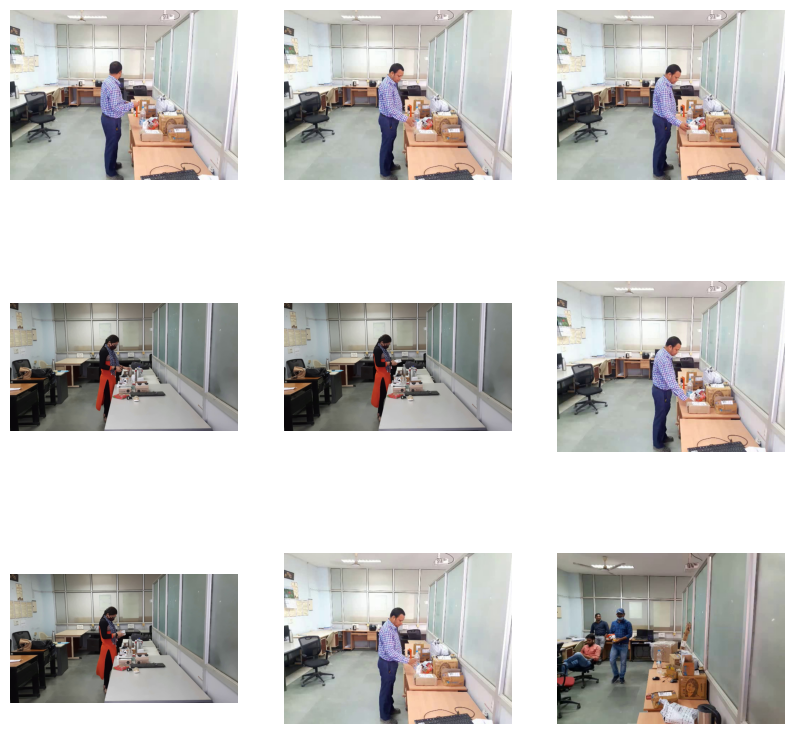

In [ ]:
import glob
import random
import cv2
import matplotlib.pyplot as plt

frames = glob.glob("/content/frame_dataset_flat/Normal/*.jpg")

print("Total Normal frames found:", len(frames))

samples = random.sample(frames, 9)

plt.figure(figsize=(10,10))
for i, img in enumerate(samples):
    plt.subplot(3,3,i+1)
    plt.imshow(cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()


Total Shoplifting frames found: 41


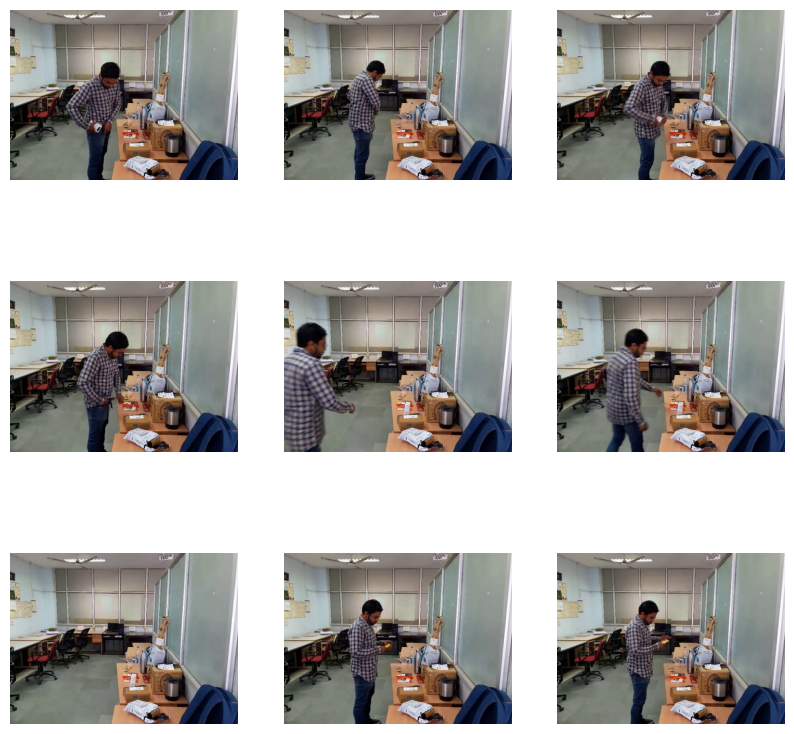

In [ ]:
frames = glob.glob("/content/frame_dataset_flat/Shoplifting/*.jpg")

print("Total Shoplifting frames found:", len(frames))

samples = random.sample(frames, 9)

plt.figure(figsize=(10,10))
for i, img in enumerate(samples):
    plt.subplot(3,3,i+1)
    plt.imshow(cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()


In [ ]:
import numpy as np

def aggregate_probs(probs):
    # Remove top and bottom 10% extreme values
    probs_sorted = sorted(probs)
    cut = max(1, int(len(probs) * 0.1))

    if len(probs_sorted) > 2 * cut:
        trimmed = probs_sorted[cut:-cut]
    else:
        trimmed = probs_sorted

    return float(np.mean(trimmed))


In [ ]:
def predict_frame_correct(frame):
    frame = cv2.resize(frame, (224, 224))
    frame = frame.astype("float32") / 255.0
    frame = np.expand_dims(frame, axis=0)
    prob = model.predict(frame, verbose=0)[0][0]
    return prob


In [ ]:
from moviepy.editor import VideoFileClip
import cv2

def predict_video_correct(video_path, threshold):
    clip = VideoFileClip(video_path)
    probs = []

    for frame in clip.iter_frames(fps=3):
        prob = predict_frame_correct(frame)
        probs.append(prob)

    if len(probs) == 0:
        return "Normal", 0.0

    final_prob = aggregate_probs(probs)

    label = "Shoplifting" if final_prob > threshold else "Normal"

    return label, round(final_prob * 100, 2)


In [ ]:
threshold = 0.7


In [ ]:
label, confidence = predict_video_correct("/content/1322056-hd_1920_1080_30fps.mp4", threshold=0.7)

print("Prediction:", label)
print("Confidence:", confidence, "%")


Prediction: Normal
Confidence: 68.72 %


In [ ]:
label, confidence = predict_video_correct("/content/dataset/final/Shoplifting dataset/Shoplifting/Shoplifting (17).mp4", threshold=0.7)

print("Prediction:", label)
print("Confidence:", confidence, "%")


Prediction: Normal
Confidence: 67.65 %


In [ ]:
def predict_frame_text(frame):
    frame_resized = cv2.resize(frame, (224, 224))
    frame_norm = frame_resized.astype("float32") / 255.0
    frame_norm = np.expand_dims(frame_norm, axis=0)
    prob = model.predict(frame_norm, verbose=0)[0][0]

    label = "Shoplifting" if prob > 0.7 else "Normal"
    confidence = round(prob * 100, 2)
    return label, confidence


In [ ]:
import cv2
import random
import matplotlib.pyplot as plt
from moviepy.editor import VideoFileClip

def show_video_frames_with_predictions(video_path, fps=2):
    clip = VideoFileClip(video_path)
    frames = []

    # Extract frames at given fps
    for frame in clip.iter_frames(fps=fps):
        frames.append(frame)

    # Pick 9 random frames
    if len(frames) < 9:
        print("Not enough frames!")
        return

    sample_frames = random.sample(frames, 9)

    # Plot 3x3 grid
    plt.figure(figsize=(12, 12))
    for i, frame in enumerate(sample_frames):
        label, conf = predict_frame_text(frame)

        plt.subplot(3, 3, i+1)
        plt.imshow(frame)
        plt.axis('off')
        plt.title(f"{label}\n{conf}%")

    plt.tight_layout()
    plt.show()


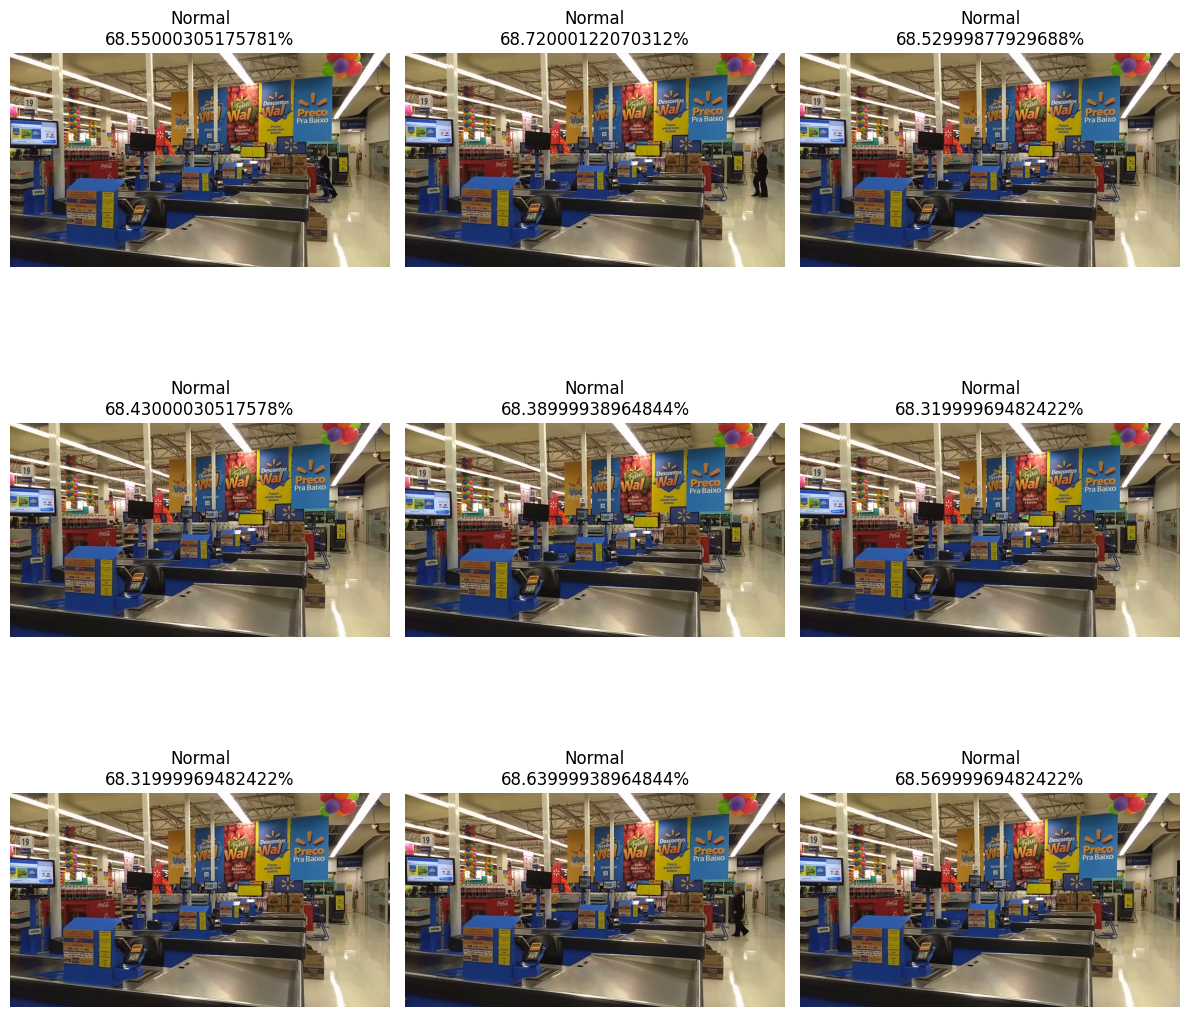

In [ ]:
show_video_frames_with_predictions("/content/1322056-hd_1920_1080_30fps.mp4")


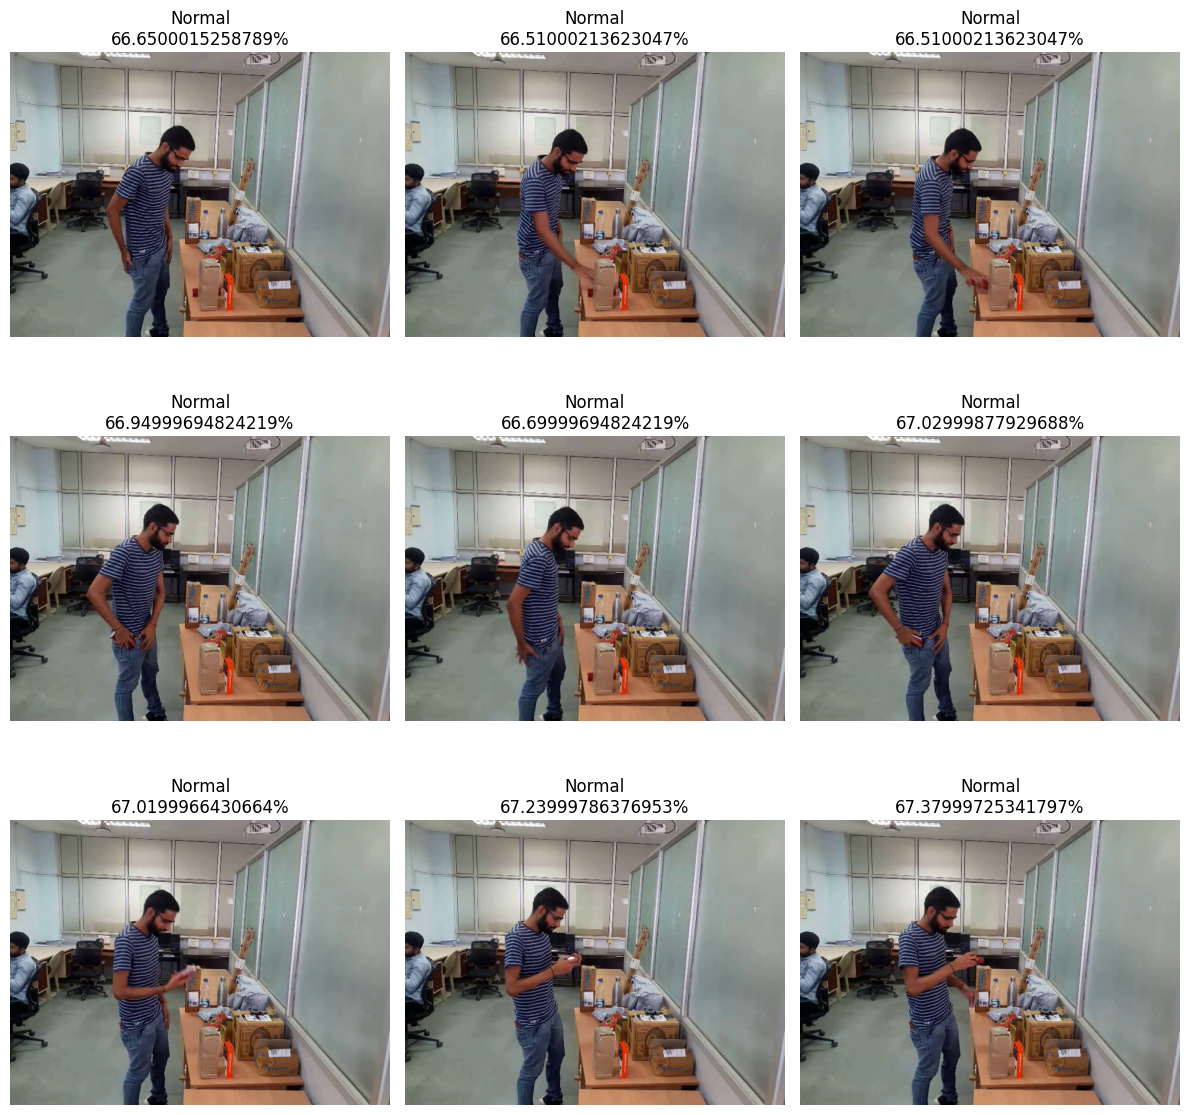

In [ ]:
show_video_frames_with_predictions("/content/dataset/final/Shoplifting dataset/Shoplifting/Shoplifting (1).mp4")


In [ ]:
from moviepy.editor import VideoFileClip

def debug_probabilities(video_path):
    clip = VideoFileClip(video_path)
    probs = []
    for frame in clip.iter_frames(fps=3):
        p = predict_frame_correct(frame)
        probs.append(p)
    print("Min:", min(probs))
    print("Max:", max(probs))
    print("Avg:", sum(probs)/len(probs))


In [ ]:
debug_probabilities("/content/dataset/final/Shoplifting dataset/Shoplifting/Shoplifting (1).mp4")


Min: 0.6650537
Max: 0.6742116
Avg: 0.66988313


In [ ]:
threshold = 0.45


In [ ]:
threshold = 0.40
threshold = 0.35


In [ ]:
def aggregate_probs(probs):
    return float(np.mean(probs))


In [ ]:
def aggregate_probs(probs):
    return float(max(probs))


In [ ]:
def final_video_prob(probs):
    mean_p = np.mean(probs)
    max_p = max(probs)

    # If there is at least one suspicious frame, use max
    if max_p > 0.55:
        return max_p

    # Else return mean (for stable normal detection)
    return mean_p


In [ ]:
def predict_video_correct(video_path, threshold=0.5):
    clip = VideoFileClip(video_path)
    probs = []

    for frame in clip.iter_frames(fps=3):
        prob = predict_frame_correct(frame)
        probs.append(prob)

    final_prob = final_video_prob(probs)

    label = "Shoplifting" if final_prob > threshold else "Normal"

    return label, round(final_prob * 100, 2)


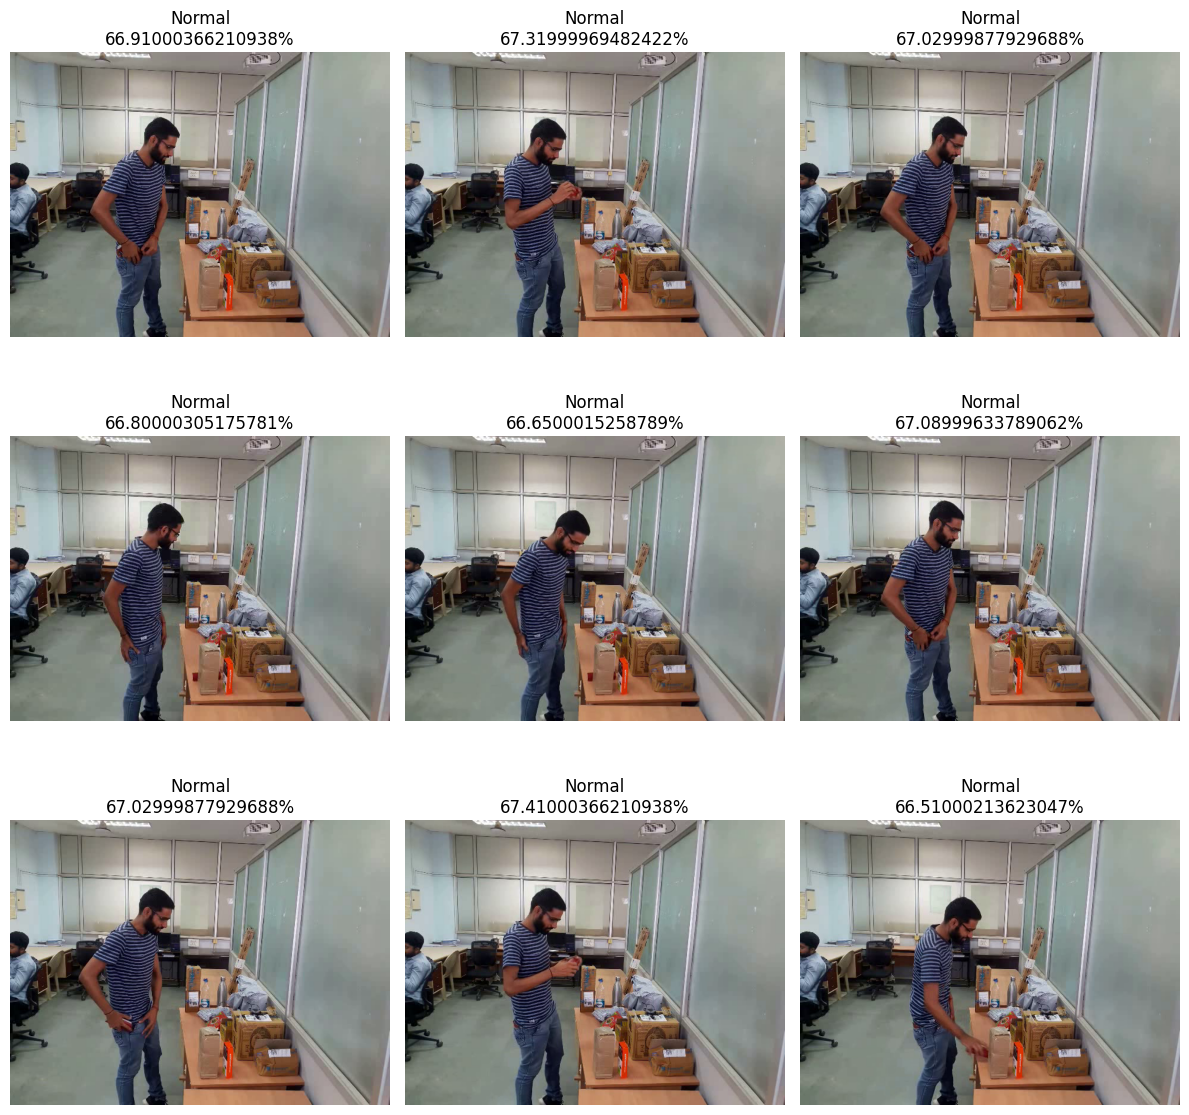

In [ ]:
show_video_frames_with_predictions("/content/dataset/final/Shoplifting dataset/Shoplifting/Shoplifting (1).mp4")


In [ ]:
import cv2
import numpy as np

def predict_frame(frame):
    frame = cv2.resize(frame, (224, 224))
    frame = frame.astype("float32") / 255.0
    frame = np.expand_dims(frame, axis=0)

    prob = model.predict(frame, verbose=0)[0][0]
    return prob


In [ ]:
def final_video_prob(probs):
    mean_p = np.mean(probs)
    max_p = max(probs)

    # If at least one strong suspicious frame exists → take max
    if max_p > 0.55:
        return max_p

    # Otherwise normal → use mean
    return mean_p


In [ ]:
from moviepy.editor import VideoFileClip

def predict_video(video_path, threshold=0.50):
    clip = VideoFileClip(video_path)
    probs = []

    for frame in clip.iter_frames(fps=3):
        prob = predict_frame(frame)
        probs.append(prob)

    # Get final probability
    final_prob = final_video_prob(probs)

    # Decide label
    if final_prob > threshold:
        label = "Shoplifting"
    else:
        label = "Normal"

    return label, round(final_prob * 100, 2)


In [ ]:
label, confidence = predict_video("/content/dataset/final/Shoplifting dataset/Shoplifting/Shoplifting (1).mp4")

print("Prediction:", label)
print("Confidence:", confidence, "%")


Prediction: Shoplifting
Confidence: 67.42 %


In [ ]:
label, confidence = predict_video("/content/1322056-hd_1920_1080_30fps.mp4")

print("Prediction:", label)
print("Confidence:", confidence, "%")


Prediction: Shoplifting
Confidence: 68.72 %


In [ ]:
def test_suspicious_frames(video_path):
    from moviepy.editor import VideoFileClip
    clip = VideoFileClip(video_path)

    for i, frame in enumerate(clip.iter_frames(fps=3)):
        prob = predict_frame(frame)
        print(f"Frame {i} → {prob}")
        if i == 20:
            break


In [ ]:
test_suspicious_frames("/content/dataset/final/Shoplifting dataset/Shoplifting/Shoplifting (1).mp4")


Frame 0 → 0.6680428385734558
Frame 1 → 0.6680312752723694
Frame 2 → 0.6662801504135132
Frame 3 → 0.6669800281524658
Frame 4 → 0.6664789915084839
Frame 5 → 0.6667702794075012
Frame 6 → 0.6650537252426147
Frame 7 → 0.6663753390312195
Frame 8 → 0.6667473316192627
Frame 9 → 0.6701809167861938
Frame 10 → 0.6742116212844849
Frame 11 → 0.6735647320747375
Frame 12 → 0.6732496023178101
Frame 13 → 0.6732302904129028
Frame 14 → 0.6729524731636047
Frame 15 → 0.674126386642456
Frame 16 → 0.671113133430481
Frame 17 → 0.670143723487854
Frame 18 → 0.6702756285667419
Frame 19 → 0.669659435749054
Frame 20 → 0.668917715549469


In [ ]:
THRESHOLD = 0.60


In [ ]:
label, confidence = predict_video("/content/1322056-hd_1920_1080_30fps.mp4", threshold=0.60)
print(label, confidence)


Shoplifting 68.72
